## load package

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample

In [3]:
import lazypredict

## import data

In [4]:
!pwd

/Users/ricky/Desktop/sp23-ancient-artifacts-team8/3_ml/binary_classification


In [5]:
master_micro = pd.read_csv("../../0_data/master.csv")

In [6]:
master_micro

,Unnamed: 0,Id,Img Id,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,...,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,0,104,10708,30.893,38.251,36.878,46.822,10.179,44.168,10.102,...,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,1,19,5682,27.727,33.375,35.149,40.001,9.029,39.022,7.978,...,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,2,14,4826,26.726,36.061,30.199,46.332,8.025,47.365,7.753,...,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,3,1,2812,24.408,36.198,25.039,57.353,5.086,50.536,4.904,...,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,4,83,9441,22.869,29.388,24.044,39.820,4.390,38.568,3.948,...,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483648,600,591,13305,0.146,0.155,0.129,0.168,0.129,0.166,0.131,...,1.000,0.069,0.129,55.000,1.271,0.000,0.000,NaN,4mm,soil
483649,601,464,10826,0.137,0.141,0.128,0.155,0.128,0.147,0.127,...,1.000,0.060,0.128,63.750,1.164,0.000,0.000,NaN,4mm,soil
483650,602,236,8388,0.144,0.149,0.128,0.163,0.128,0.156,0.132,...,1.000,0.065,0.128,56.667,1.180,0.000,0.000,NaN,4mm,soil
483651,603,369,9727,0.148,0.154,0.126,0.179,0.126,0.174,0.126,...,1.000,0.069,0.126,56.667,1.383,0.000,0.000,NaN,4mm,soil


In [7]:
micro = master_micro[(master_micro['size_micro']=="1mm") | (master_micro['type_micro']=="lithic")].iloc[: , 3:]

In [8]:
pd.set_option('display.max_columns', None)
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,Filter0,Filter1,Filter2,Filter3,Filter4,Filter5,Filter6,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0,0.081,0.000,2998.247,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0,0.126,0.000,2415.141,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0,0.096,0.000,2243.981,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0,0.088,0.000,1871.602,Reject,Reject,Reject,Reject,Reject,Reject,Reject,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0,0.077,0.000,1642.977,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478703,0.220,0.301,0.277,0.377,0.125,0.379,0.115,0.259,0.007,0.038,0.945,0.047,0.857,0.731,3.008,0.332,0.584,0.341,0.303,0.535,0.814,0.186,0.907,0.806,0,0.506,0.393,0.152,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.360,0.735,2.211,0.452,0.187,0.201,67.778,3.305,0.598,0.065,NaN,1mm,soil
478704,0.148,0.162,0.125,0.192,0.125,0.181,0.124,0.124,0.002,0.017,0.509,0.018,0.507,0.913,1.536,0.651,0.769,0.591,0.682,0.834,0.974,0.026,0.997,0.713,0,0.443,0.296,0.069,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.536,0.651,1.000,1.000,0.071,0.125,47.143,1.467,0.000,0.000,NaN,1mm,soil
478705,0.178,0.191,0.148,0.259,0.125,0.268,0.120,0.151,0.003,0.025,0.601,0.025,0.600,0.931,2.073,0.482,0.686,0.471,0.447,0.866,0.994,0.006,0.999,0.767,0,0.354,0.000,0.100,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.753,0.570,1.183,0.846,0.100,0.137,60.000,2.237,0.000,0.000,NaN,1mm,soil
478706,0.149,0.164,0.125,0.194,0.125,0.189,0.118,0.118,0.002,0.017,0.515,0.018,0.508,0.908,1.554,0.643,0.766,0.587,0.623,0.825,0.954,0.046,0.986,0.716,0,0.535,0.000,0.070,Reject,Reject,Reject,Reject,Reject,Reject,Reject,1.554,0.643,1.000,1.000,0.073,0.125,55.000,1.606,0.000,0.000,NaN,1mm,soil


## data processing

### Other processing

In [9]:
# Drop the columns (filter1, filter2, ...)
to_drop = micro.filter(regex='^Filter').columns
micro = micro.drop(columns=to_drop)
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,hash,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,Krumbein Rnd,size_micro,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0,0.081,0.000,2998.247,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,0.214,unknown,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0,0.126,0.000,2415.141,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,0.214,unknown,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0,0.096,0.000,2243.981,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,0.219,unknown,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0,0.088,0.000,1871.602,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,0.251,unknown,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0,0.077,0.000,1642.977,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,0.276,unknown,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478703,0.220,0.301,0.277,0.377,0.125,0.379,0.115,0.259,0.007,0.038,0.945,0.047,0.857,0.731,3.008,0.332,0.584,0.341,0.303,0.535,0.814,0.186,0.907,0.806,0,0.506,0.393,0.152,1.360,0.735,2.211,0.452,0.187,0.201,67.778,3.305,0.598,0.065,NaN,1mm,soil
478704,0.148,0.162,0.125,0.192,0.125,0.181,0.124,0.124,0.002,0.017,0.509,0.018,0.507,0.913,1.536,0.651,0.769,0.591,0.682,0.834,0.974,0.026,0.997,0.713,0,0.443,0.296,0.069,1.536,0.651,1.000,1.000,0.071,0.125,47.143,1.467,0.000,0.000,NaN,1mm,soil
478705,0.178,0.191,0.148,0.259,0.125,0.268,0.120,0.151,0.003,0.025,0.601,0.025,0.600,0.931,2.073,0.482,0.686,0.471,0.447,0.866,0.994,0.006,0.999,0.767,0,0.354,0.000,0.100,1.753,0.570,1.183,0.846,0.100,0.137,60.000,2.237,0.000,0.000,NaN,1mm,soil
478706,0.149,0.164,0.125,0.194,0.125,0.189,0.118,0.118,0.002,0.017,0.515,0.018,0.508,0.908,1.554,0.643,0.766,0.587,0.623,0.825,0.954,0.046,0.986,0.716,0,0.535,0.000,0.070,1.554,0.643,1.000,1.000,0.073,0.125,55.000,1.606,0.000,0.000,NaN,1mm,soil


In [10]:
micro = micro.drop(columns=['hash', 'size_micro', 'Krumbein Rnd']) #'Krumbein Rnd'
micro

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,type_micro
0,30.893,38.251,36.878,46.822,10.179,44.168,10.102,34.444,9202.973,749.562,120.170,802.914,108.399,0.808,4.600,0.217,0.660,0.435,0.229,0.652,0.934,0.066,0.902,1.573,0.081,0.000,2998.247,1.270,0.788,3.623,0.276,3211.655,23.529,19.392,4.372,49.768,22.823,lithic
1,27.727,33.375,35.149,40.001,9.029,39.022,7.978,34.108,6646.859,603.785,104.849,636.820,99.590,0.831,4.430,0.226,0.693,0.480,0.204,0.690,0.948,0.052,0.950,1.672,0.126,0.000,2415.141,1.138,0.879,3.893,0.257,2547.278,22.089,20.688,4.891,37.445,5.128,lithic
2,26.726,36.061,30.199,46.332,8.025,47.365,7.753,28.230,5879.233,560.995,113.290,642.874,100.583,0.741,5.774,0.173,0.577,0.333,0.164,0.549,0.873,0.127,0.888,1.509,0.096,0.000,2243.981,1.534,0.652,3.763,0.266,2571.497,19.112,21.250,6.110,52.384,17.379,lithic
3,24.408,36.198,25.039,57.353,5.086,50.536,4.904,23.943,3824.409,467.900,113.719,500.291,108.846,0.674,11.276,0.089,0.426,0.181,0.097,0.455,0.935,0.065,0.957,1.604,0.088,0.000,1871.602,2.291,0.437,4.923,0.203,2001.165,15.063,18.233,10.304,51.467,17.096,lithic
4,22.869,29.388,24.044,39.820,4.390,38.568,3.948,22.535,2200.862,410.744,92.327,436.309,89.254,0.778,9.070,0.110,0.574,0.330,0.102,0.606,0.941,0.059,0.967,2.350,0.077,0.000,1642.977,1.656,0.604,5.477,0.183,1745.237,14.217,17.086,9.769,36.426,3.135,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478703,0.220,0.301,0.277,0.377,0.125,0.379,0.115,0.259,0.007,0.038,0.945,0.047,0.857,0.731,3.008,0.332,0.584,0.341,0.303,0.535,0.814,0.186,0.907,0.806,0.506,0.393,0.152,1.360,0.735,2.211,0.452,0.187,0.201,67.778,3.305,0.598,0.065,soil
478704,0.148,0.162,0.125,0.192,0.125,0.181,0.124,0.124,0.002,0.017,0.509,0.018,0.507,0.913,1.536,0.651,0.769,0.591,0.682,0.834,0.974,0.026,0.997,0.713,0.443,0.296,0.069,1.536,0.651,1.000,1.000,0.071,0.125,47.143,1.467,0.000,0.000,soil
478705,0.178,0.191,0.148,0.259,0.125,0.268,0.120,0.151,0.003,0.025,0.601,0.025,0.600,0.931,2.073,0.482,0.686,0.471,0.447,0.866,0.994,0.006,0.999,0.767,0.354,0.000,0.100,1.753,0.570,1.183,0.846,0.100,0.137,60.000,2.237,0.000,0.000,soil
478706,0.149,0.164,0.125,0.194,0.125,0.189,0.118,0.118,0.002,0.017,0.515,0.018,0.508,0.908,1.554,0.643,0.766,0.587,0.623,0.825,0.954,0.046,0.986,0.716,0.535,0.000,0.070,1.554,0.643,1.000,1.000,0.073,0.125,55.000,1.606,0.000,0.000,soil


### Redersampling

https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/
https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

In [11]:
!pip install imblearn

In [12]:
# from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter

In [13]:
micro.groupby('type_micro').describe()

Da                                                          \
              count      mean       std    min    25%    50%    75%     max   
type_micro                                                                    
lithic       5299.0  0.408032  1.629126  0.040  0.161  0.193  0.251  30.893   
soil        10191.0  0.859683  0.593296  0.104  0.287  0.624  1.356   3.783   

                 Dp                                                          \
              count      mean       std    min    25%    50%    75%     max   
type_micro                                                                    
lithic       5299.0  0.533303  2.193727  0.058  0.198  0.250  0.330  38.251   
soil        10191.0  0.930845  0.639726  0.131  0.316  0.696  1.459   4.326   

             FWidth                                                          \
              count      mean       std    min    25%    50%    75%     max   
type_micro                                                                    
lithic       5299.0  0.351058  1.685466  0.021  0.107  0.138  0.194  36.878   
soil        10191.0  0.841913  0.582515  0.125  0.282  0.621  1.338   4.096   

            FLength                                                          \
              count      mean       std    min    25%    50%    75%     max   
type_micro                                                                    
lithic       5299.0  0.731248  3.023436  0.074  0.254  0.339  0.458  57.353   
soil        10191.0  1.177975  0.829635  0.136  0.398  0.914  1.847   5.376   

           FThickness                                                          \
                count      mean       std    min    25%    50%    75%     max   
type_micro                                                                      
lithic         5299.0  0.220404  0.661258  0.021  0.102  0.130  0.170  16.445   
soil          10191.0  0.603765  0.424010  0.125  0.205  0.436  0.969   2.614   

            ELength                                                           \
              count      mean       std    min    25%    50%     75%     max   
type_micro                                                                     
lithic       5299.0  0.700690  2.950370  0.041  0.238  0.315  0.4315  50.536   
soil        10191.0  1.164056  0.824259  0.132  0.392  0.913  1.8190   5.341   

           EThickness                                                   \
                count      mean       std    min    25%    50%     75%   
type_micro                                                               
lithic         5299.0  0.208487  0.623842  0.015  0.096  0.122  0.1630   
soil          10191.0  0.600125  0.424563  0.084  0.201  0.432  0.9675   

                     EWidth                                                   \
               max    count      mean       std    min     25%    50%    75%   
type_micro                                                                     
lithic      16.227   5299.0  0.336963  1.629089  0.015  0.1000  0.130  0.186   
soil         2.526  10191.0  0.838245  0.581375  0.096  0.2795  0.616  1.334   

                     Volume                                              \
               max    count       mean         std    min    25%    50%   
type_micro                                                                
lithic      34.444   5299.0  16.602042  236.156080  0.000  0.002  0.003   
soil         4.120  10191.0   0.774874    1.082688  0.001  0.012  0.124   

                                 Area                                     \
               75%       max    count      mean        std    min    25%   
type_micro                                                                 
lithic      0.0070  9202.973   5299.0  2.214862  25.126003  0.001  0.020   
soil        1.2115    29.083  10191.0  0.856886   0.917978  0.008  0.065   

                                   Perimeter                             \
              50%     

In [14]:
# define the undersampling method
undersample = SMOTE(sampling_strategy='minority')
# undersample = TomekLinks(sampling_strategy='majority')
# undersample = CondensedNearestNeighbour(n_neighbors=1)

# Separate majority and minority classes
class_column = ['type_micro']
X = micro.drop(columns=class_column)
y = micro[class_column]

X_resampled, y_resampled = undersample.fit_resample(X, y)

In [15]:
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)


In [16]:
data_resampled.columns = X.columns.tolist() + ['type_micro']


In [17]:
data_resampled

,Da,Dp,FWidth,FLength,FThickness,ELength,EThickness,EWidth,Volume,Area,Perimeter,CHull Area,CHull Perimeter,Sphericity,L/T Ratio,T/L Aspect Ratio,Compactness,Roundness,Ellipse Ratio,Circularity,Solidity,Concavity,Convexity,Extent,Transparency,Curvature,Surface Area,L/W Ratio,W/L Ratio,W/T Ratio,T/W Ratio,CHull Surface Area,Sieve,Angularity,Ellipticity,Fiber Length,Fiber Width,type_micro
0,30.893000,38.251000,36.878000,46.822000,10.179000,44.168000,10.102000,34.444000,9202.973000,749.562000,120.170000,802.914000,108.399000,0.808000,4.600000,0.217000,0.660000,0.435000,0.229000,0.652000,0.934000,0.066000,0.902000,1.573000,0.081000,0.000000,2998.247000,1.270000,0.788000,3.623000,0.276000,3211.655000,23.529000,19.392000,4.372000,49.768000,22.823000,lithic
1,27.727000,33.375000,35.149000,40.001000,9.029000,39.022000,7.978000,34.108000,6646.859000,603.785000,104.849000,636.820000,99.590000,0.831000,4.430000,0.226000,0.693000,0.480000,0.204000,0.690000,0.948000,0.052000,0.950000,1.672000,0.126000,0.000000,2415.141000,1.138000,0.879000,3.893000,0.257000,2547.278000,22.089000,20.688000,4.891000,37.445000,5.128000,lithic
2,26.726000,36.061000,30.199000,46.332000,8.025000,47.365000,7.753000,28.230000,5879.233000,560.995000,113.290000,642.874000,100.583000,0.741000,5.774000,0.173000,0.577000,0.333000,0.164000,0.549000,0.873000,0.127000,0.888000,1.509000,0.096000,0.000000,2243.981000,1.534000,0.652000,3.763000,0.266000,2571.497000,19.112000,21.250000,6.110000,52.384000,17.379000,lithic
3,24.408000,36.198000,25.039000,57.353000,5.086000,50.536000,4.904000,23.943000,3824.409000,467.900000,113.719000,500.291000,108.846000,0.674000,11.276000,0.089000,0.426000,0.181000,0.097000,0.455000,0.935000,0.065000,0.957000,1.604000,0.088000,0.000000,1871.602000,2.291000,0.437000,4.923000,0.203000,2001.165000,15.063000,18.233000,10.304000,51.467000,17.096000,lithic
4,22.869000,29.388000,24.044000,39.820000,4.390000,38.568000,3.948000,22.535000,2200.862000,410.744000,92.327000,436.309000,89.254000,0.778000,9.070000,0.110000,0.574000,0.330000,0.102000,0.606000,0.941000,0.059000,0.967000,2.350000,0.077000,0.000000,1642.977000,1.656000,0.604000,5.477000,0.183000,1745.237000,14.217000,17.086000,9.769000,36.426000,3.135000,lithic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20377,0.048263,0.065039,0.023697,0.083671,0.023697,0.089473,0.024224,0.024224,0.000000,0.001724,0.205170,0.001724,0.205104,0.742066,3.525316,0.283868,0.584026,0.340763,0.264289,0.550132,0.999474,0.000526,0.999934,0.943211,0.000000,0.000000,0.008697,3.525316,0.283868,1.000000,1.000000,0.008763,0.023697,0.000000,3.792279,12.736457,9.351064,lithic
20378,0.191954,0.281211,0.114573,0.397404,0.114573,0.398789,0.097447,0.097447,0.003313,0.029194,0.882886,0.032883,0.870071,0.683815,3.465781,0.288940,0.483692,0.234630,0.244125,0.468128,0.891174,0.108826,0.985624,0.637256,0.483074,0.514874,0.117775,3.465781,0.288940,1.000000,1.000000,0.133407,0.114573,68.333000,4.096245,0.326347,0.089194,lithic
20379,0.168411,0.197201,0.114580,0.258075,0.114580,0.252865,0.110622,0.110622,0.001958,0.022832,0.620435,0.022832,0.619477,0.855378,2.249210,0.444958,0.654874,0.428832,0.439463,0.730715,0.987336,0.012664,0.999042,0.757790,0.513006,0.000000,0.089369,2.249210,0.444958,1.000000,1.000000,0.090327,0.114580,68.000000,2.275645,0.209402,0.107042,lithic
20380,0.275304,0.352702,0.232693,0.500315,0.074566,0.504274,0.070522,0.225693,0.004174,0.059652,1.107671,0.062826,1.096323,0.783334,6.711343,0.148782,0.552641,0.305945,0.140519,0.615588,0.943912,0.056088,0.989826,1.611466,0.533389,0.077641,0.237956,2.157506,0.468030,3.133579,0.321182,0.252304,0.153956,85.825966,7.142618,0.446229,0.070616,lithic


In [18]:
data_resampled.groupby('type_micro').describe()

Da                                                       \
              count      mean       std    min    25%      50%       75%   
type_micro                                                                 
lithic      10191.0  0.399918  1.543338  0.040  0.162  0.19271  0.248099   
soil        10191.0  0.859683  0.593296  0.104  0.287  0.62400  1.356000   

                         Dp                                                \
               max    count      mean       std    min      25%       50%   
type_micro                                                                  
lithic      30.893  10191.0  0.521518  2.071976  0.058  0.19968  0.249042   
soil         3.783  10191.0  0.930845  0.639726  0.131  0.31600  0.696000   

                               FWidth                                    \
                 75%     max    count      mean       std    min    25%   
type_micro                                                                
lithic      0.326923  38.251  10191.0  0.340773  1.578423  0.021  0.107   
soil        1.459000   4.326  10191.0  0.841913  0.582515  0.125  0.282   

                                  FLength                                    \
              50%    75%     max    count      mean       std    min    25%   
type_micro                                                                    
lithic      0.137  0.192  36.878  10191.0  0.716384  2.861070  0.074  0.257   
soil        0.621  1.338   4.096  10191.0  1.177975  0.829635  0.136  0.398   

                                       FThickness                            \
                 50%       75%     max      count      mean      std    min   
type_micro                                                                    
lithic      0.338446  0.454634  57.353    10191.0  0.218971  0.64456  0.021   
soil        0.914000  1.847000   5.376    10191.0  0.603765  0.42401  0.125   

                                               ELength                      \
              25%       50%       75%     max    count      mean       std   
type_micro                                                                   
lithic      0.103  0.129266  0.169428  16.445  10191.0  0.687826  2.809977   
soil        0.205  0.436000  0.969000   2.614  10191.0  1.164056  0.824259   

                                                  EThickness            \
              min       25%    50%    75%     max      count      mean   
type_micro                                                               
lithic      0.041  0.240128  0.315  0.429  50.536    10191.0  0.207071   
soil        0.132  0.392000  0.913  1.819   5.341    10191.0  0.600125   

                                                               EWidth  \
                 std    min       25%    50%     75%     max    count   
type_micro                                                              
lithic      0.608718  0.015  0.096405  0.122  0.1620  16.227  10191.0   
soil        0.424563  0.084  0.201000  0.432  0.9675   2.526  10191.0   

                                                                           \
                mean       std    min     25%       50%       75%     max   
type_micro                                                                  
lithic      0.327554  1.532933  0.015  0.1000  0.129161  0.184972  34.444   
soil        0.838245  0.581375  0.096  0.2795  0.616000  1.334000   4.120   

             Volume                                                        \
              count       mean         std    min    25%    50%       75%   
type_micro                                                                  
lithic      10191.0  14.463179  208.440865  0.000  0.002  0.003  0.006593   
soil        10191.0   0.774874    1.082688  0.001  0.012  0.124  1.211500   

                         Area                                               \
                 max    count      mean        std    min       25%    50%   
type_micro                

In [19]:
# # Separate majority and minority classes
# df_majority = micro1[micro1.type_micro=='soil']
# df_minority = micro1[micro1.type_micro=='lithic']

# # Downsample majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=5299,     # to match minority class
#                                  random_state=123) # reproducible results
 
# # Combine minority class with downsampled majority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])

### Selected features

In [20]:
# micro1_selected = micro1[["Transparency","FLength","FWidth","FThickness","W/L Ratio", "L/W Ratio", 'Sphericity', 'Circularity', 'Convexity',"type_micro"]]


### Hold-out data

In [21]:
# from sklearn.model_selection import train_test_split
# import numpy as np

# # X is your feature data
# # y is your target data
# X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

# # Now you can perform the train-test split on X_train and y_train
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42)

## Models

### Lazy predict

In [22]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [23]:
class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [24]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████| 29/29 [01:13<00:00,  2.53s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,1.00,None,1.00,1.01
RandomForestClassifier,0.99,0.99,None,0.99,4.42
ExtraTreesClassifier,0.99,0.99,None,0.99,1.33
AdaBoostClassifier,0.99,0.99,None,0.99,3.21
BaggingClassifier,0.99,0.99,None,0.99,2.66
SVC,0.99,0.99,None,0.99,2.93
LabelSpreading,0.99,0.99,None,0.99,14.66
LabelPropagation,0.99,0.99,None,0.99,8.77
DecisionTreeClassifier,0.98,0.98,None,0.98,0.50


### LightBGM

#### train-test split

In [25]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [26]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [27]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 1.0000
Accuracy of LGBM classifier on test set: 0.9971
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2039
           1       1.00      1.00      1.00      2038

    accuracy                           1.00      4077
   macro avg       1.00      1.00      1.00      4077
weighted avg       1.00      1.00      1.00      4077



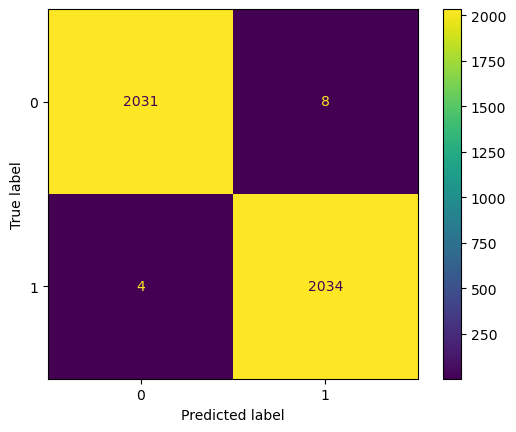

In [29]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

lgbm = LGBMClassifier(random_state=random_seed)
lgbm.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(lgbm.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(lgbm.score(X_test_transformed, y_test_transformed)))

pred = lgbm.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, lgbm.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm.classes_)
disp.plot()

plt.show()


In [30]:
acc_train1_LBGM = lgbm.score(X_train_transformed, y_train_transformed)
acc_test1_LBGM = lgbm.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {'num_leaves': [31, 63, 127],
              'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [100, 500, 1000]
             }

In [33]:
grid_search = GridSearchCV(lgbm, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 500, 1000],
                         'num_leaves': [31, 63, 127]})

In [34]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 1000, 'num_leaves': 31}


In [35]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.27,0.25,0.03,0.00,0.1,1000,31,"{'learning_rate': 0.1, 'n_estimators': 1000, '...",1.00,1.00,1.00,1.00,1.00,1.00,0.00,1
3,2.75,0.92,0.03,0.01,0.1,500,31,"{'learning_rate': 0.1, 'n_estimators': 500, 'n...",1.00,1.00,1.00,1.00,1.00,1.00,0.00,2
4,0.94,0.09,0.02,0.00,0.1,500,63,"{'learning_rate': 0.1, 'n_estimators': 500, 'n...",1.00,1.00,1.00,1.00,1.00,1.00,0.00,3


In [36]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of LBGM classifier on training set: 1.0000
Accuracy of LBGM classifier on test set: 0.9971
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2039
           1       1.00      1.00      1.00      2038

    accuracy                           1.00      4077
   macro avg       1.00      1.00      1.00      4077
weighted avg       1.00      1.00      1.00      4077



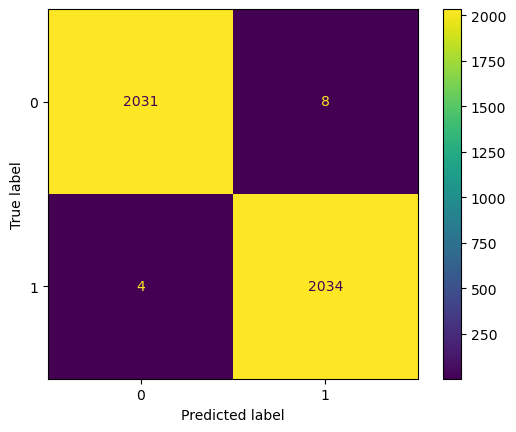

In [37]:
print('Accuracy of LBGM classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LBGM classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [38]:
acc_train2_LBGM = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_LBGM = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [39]:
importances = lgbm.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_LGBM = importance_df

          feature_name  importance
33         Ellipticity         513
24           Curvature         307
22              Extent         299
13           L/T Ratio         136
25        Surface Area         126
30  CHull Surface Area         122
4              ELength         118
27           W/L Ratio         114
19            Solidity         102
12          Sphericity          99


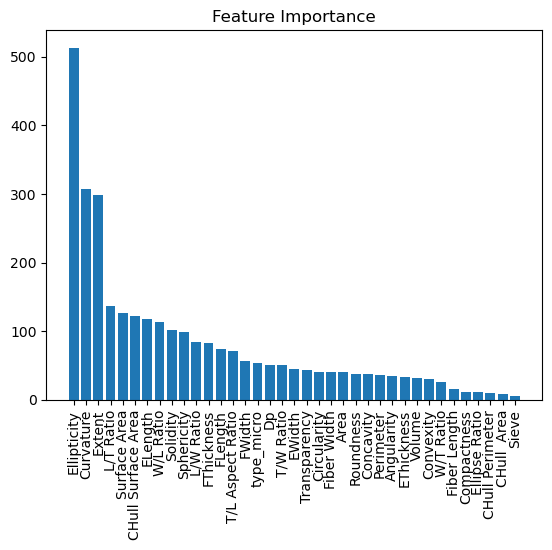

In [40]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### AdaBoost (Adaptive Boosting)

#### Train-test split

In [41]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [42]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [43]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.9914
Accuracy of LGBM classifier on test set: 0.9909
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2039
           1       0.99      0.99      0.99      2038

    accuracy                           0.99      4077
   macro avg       0.99      0.99      0.99      4077
weighted avg       0.99      0.99      0.99      4077



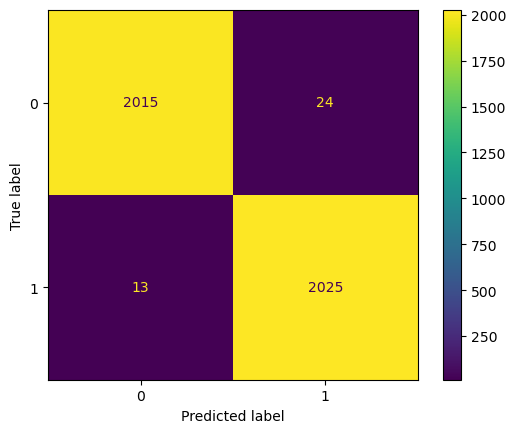

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

ada = AdaBoostClassifier(random_state=random_seed)
ada.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(ada.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(ada.score(X_test_transformed, y_test_transformed)))

pred = ada.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, ada.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada.classes_)
disp.plot()

plt.show()

In [46]:
acc_train1_ada = ada.score(X_train_transformed, y_train_transformed)
acc_test1_ada = ada.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.1, 0.5, 1.0],
              'algorithm': ['SAMME', 'SAMME.R']}

In [49]:
grid_search = GridSearchCV(ada, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150]})

In [50]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 150}


In [51]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,5.01,0.05,0.07,0.00,SAMME.R,1.0,150,"{'algorithm': 'SAMME.R', 'learning_rate': 1.0,...",0.99,0.99,0.99,0.99,1.00,0.99,0.00,1
16,3.30,0.01,0.05,0.00,SAMME.R,1.0,100,"{'algorithm': 'SAMME.R', 'learning_rate': 1.0,...",0.99,0.99,0.99,0.99,0.99,0.99,0.00,2
14,5.40,0.09,0.07,0.00,SAMME.R,0.5,150,"{'algorithm': 'SAMME.R', 'learning_rate': 0.5,...",0.99,0.99,0.99,0.99,0.99,0.99,0.00,3


In [52]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of AdaBoost classifier on training set: 0.9978
Accuracy of AdaBoost classifier on test set: 0.9961
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2039
           1       1.00      1.00      1.00      2038

    accuracy                           1.00      4077
   macro avg       1.00      1.00      1.00      4077
weighted avg       1.00      1.00      1.00      4077



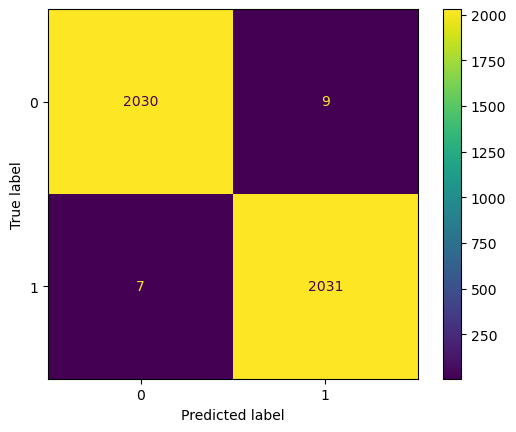

In [53]:
print('Accuracy of AdaBoost classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of AdaBoost classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [54]:
acc_train2_ada = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_ada = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [55]:
importances = ada.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_ada = importance_df

          feature_name  importance
33         Ellipticity        0.20
24           Curvature        0.12
22              Extent        0.10
12          Sphericity        0.10
30  CHull Surface Area        0.08
4              ELength        0.04
14    T/L Aspect Ratio        0.04
13           L/T Ratio        0.04
26           L/W Ratio        0.04
25        Surface Area        0.04


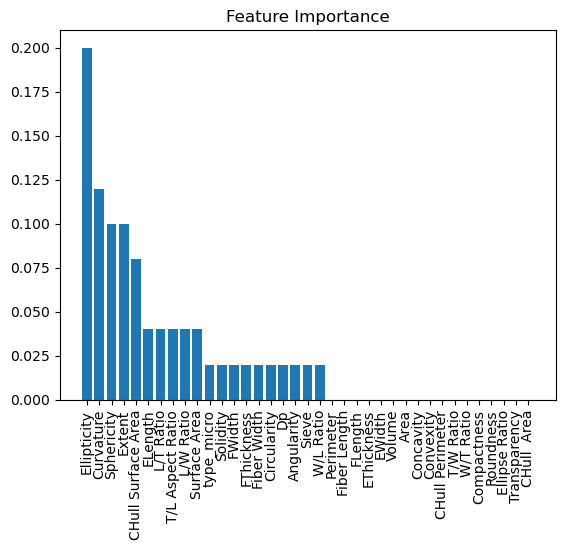

In [56]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Random forest

#### Train-test split

In [57]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

X_holdout = X_test
y_holdout = y_test

In [58]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [59]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [60]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of RF classifier on training set: 1.0000
Accuracy of RF classifier on test set: 0.9924
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2039
           1       0.99      0.99      0.99      2038

    accuracy                           0.99      4077
   macro avg       0.99      0.99      0.99      4077
weighted avg       0.99      0.99      0.99      4077



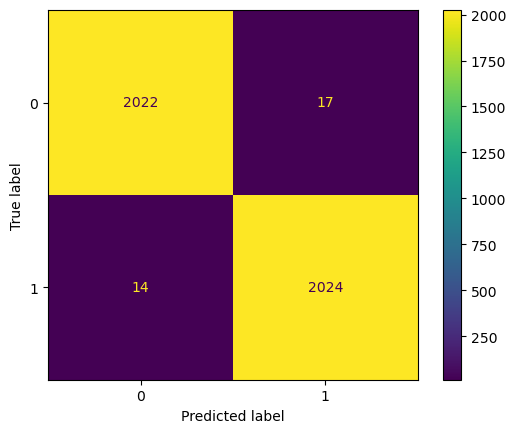

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

rf = RandomForestClassifier(random_state=random_seed)
rf.fit(X_train_transformed, y_train_transformed)
print('Accuracy of RF classifier on training set: {:.4f}'.format(rf.score(X_train_transformed, y_train_transformed)))
print('Accuracy of RF classifier on test set: {:.4f}'.format(rf.score(X_test_transformed, y_test_transformed)))

pred = rf.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, rf.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

plt.show()

In [62]:
acc_train1_rf = rf.score(X_train_transformed, y_train_transformed)
acc_test1_rf = rf.score(X_test_transformed, y_test_transformed)

#### Grid search for hyperparameter tuning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
#               'min_samples_leaf': [1, 2, 4],
#               'max_features': ['auto', 'sqrt', 'log2'],
#               'max_leaf_nodes': [10, 20, 30],
#               'class_weight':[None, 'balanced'],
#               'criterion': ['gini', 'entropy']}

In [65]:
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [66]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [67]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.35,0.01,0.01,0.00,None,2,50,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.99,0.98,0.98,0.99,0.98,0.98,0.00,1
2,0.69,0.01,0.01,0.00,None,2,100,"{'max_depth': None, 'min_samples_split': 2, 'n...",0.99,0.98,0.98,0.99,0.98,0.98,0.00,2
5,0.69,0.02,0.01,0.00,None,5,100,"{'max_depth': None, 'min_samples_split': 5, 'n...",0.99,0.98,0.98,0.99,0.98,0.98,0.00,3


#### Cross validation

In [68]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# Perform cross-validation after grid search
scores = cross_val_score(grid_search, X_test_transformed, y_test_transformed, cv=10)
print("Cross-validation scores: ", scores)
print("Mean accuracy: ", scores.mean())

Cross-validation scores:  [0.99509804 0.9754902  0.98284314 0.98039216 0.97303922 0.9754902
 0.98284314 0.99017199 0.98280098 0.97788698]
Mean accuracy:  0.9816056029291322


#### Re-run model

Accuracy of Random Forest classifier on training set: 0.9831
Accuracy of Random Forest classifier on test set: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2039
           1       1.00      1.00      1.00      2038

    accuracy                           1.00      4077
   macro avg       1.00      1.00      1.00      4077
weighted avg       1.00      1.00      1.00      4077



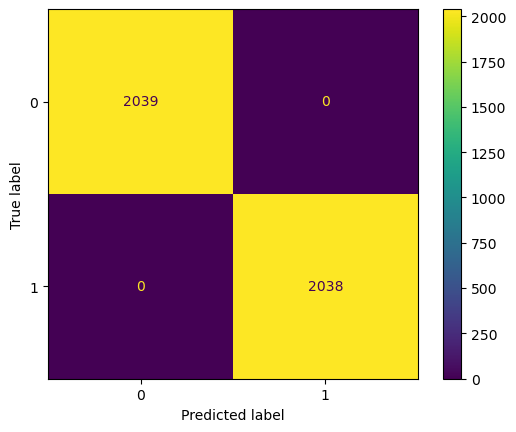

In [69]:
print('Accuracy of Random Forest classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Random Forest classifier on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [70]:
acc_train2_rf = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_rf = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [71]:
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = data_resampled.columns[1:]
names = [feature_names[i] for i in indices]

importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# Sort the dataframe by importance
importance_df.sort_values(by='importance', ascending=False, inplace=True)

# Print the top 10 features
print(importance_df.head(10))

fi_rf = importance_df

          feature_name  importance
30  CHull Surface Area        0.17
29           T/W Ratio        0.12
2              FLength        0.09
7               Volume        0.08
33         Ellipticity        0.06
32          Angularity        0.05
27           W/L Ratio        0.05
28           W/T Ratio        0.05
19            Solidity        0.04
13           L/T Ratio        0.03


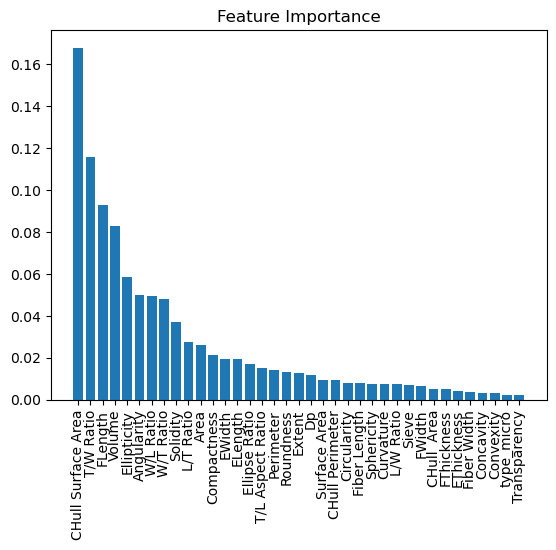

In [72]:
# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Bagging (Bootstrapped Aggregation)

#### Train-test split

In [73]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [74]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [75]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [76]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LGBM classifier on training set: 0.9728
Accuracy of LGBM classifier on test set: 0.9728
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2039
           1       0.96      0.98      0.97      2038

    accuracy                           0.97      4077
   macro avg       0.97      0.97      0.97      4077
weighted avg       0.97      0.97      0.97      4077



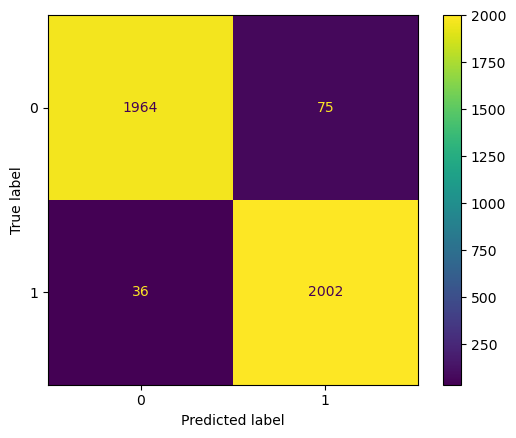

In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

base_estimator = DecisionTreeClassifier(max_depth=4, random_state=random_seed)
bagging = BaggingClassifier(base_estimator=base_estimator, random_state=random_seed)
bagging.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LGBM classifier on training set: {:.4f}'.format(bagging.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LGBM classifier on test set: {:.4f}'.format(bagging.score(X_test_transformed, y_test_transformed)))

pred = bagging.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, bagging.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging.classes_)
disp.plot()

plt.show()

In [78]:
acc_train1_bagging = bagging.score(X_train_transformed, y_train_transformed)
acc_test1_bagging = bagging.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
param_grid = {'n_estimators': [50, 100, 150],
              'max_samples': [0.5, 1.0, 2.0],
              'max_features': [0.5, 1.0, 2.0]}

In [81]:
grid_search = GridSearchCV(bagging, param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train_transformed)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                                               random_state=42),
                                         random_state=42),
             param_grid={'max_features': [0.5, 1.0, 2.0],
                         'max_samples': [0.5, 1.0, 2.0],
                         'n_estimators': [50, 100, 150]})

In [82]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}


In [83]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,7.78,0.33,0.10,0.03,1.0,0.5,150,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.97,0.98,0.97,0.97,0.97,0.97,0.00,1
10,5.40,0.12,0.06,0.01,1.0,0.5,100,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.97,0.98,0.97,0.97,0.97,0.97,0.00,1
9,2.76,0.15,0.03,0.01,1.0,0.5,50,"{'max_features': 1.0, 'max_samples': 0.5, 'n_e...",0.97,0.98,0.97,0.97,0.97,0.97,0.00,3


In [84]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of Bagging classifier on training set: 0.9733
Accuracy of Bagging classifie on test set: 0.9738
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2039
           1       0.96      0.98      0.97      2038

    accuracy                           0.97      4077
   macro avg       0.97      0.97      0.97      4077
weighted avg       0.97      0.97      0.97      4077



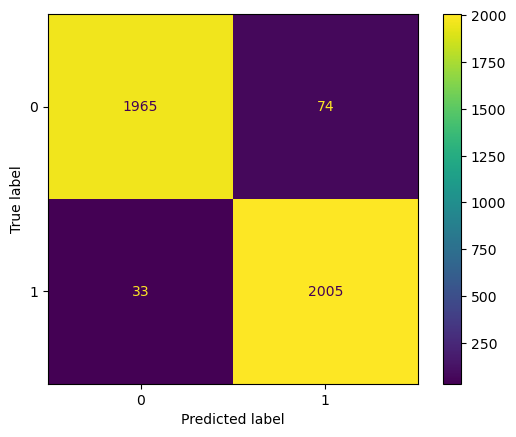

In [85]:
print('Accuracy of Bagging classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of Bagging classifie on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [86]:
acc_train2_bagging = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_bagging = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [87]:
# importances = bagging.feature_importances_

# # Sort the feature importances in descending order
# indices = np.argsort(importances)[::-1]
# feature_names = data_resampled.columns[1:]
# names = [feature_names[i] for i in indices]

# importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# # Sort the dataframe by importance
# importance_df.sort_values(by='importance', ascending=False, inplace=True)

# # Print the top 10 features
# print(importance_df.head(10))

# fi_bagging = importance_df

In [88]:
# # Create plot
# plt.figure()

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(X_train.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.xticks(range(X_train.shape[1]), names, rotation=90)

# # Show plot
# plt.show()

### SVC (Support Vector Classification)

#### Train-test split

In [89]:
# machine learning libs
from sklearn.model_selection import train_test_split

class_column = ['type_micro']
random_seed = 42

features = data_resampled.drop(columns=class_column)
target = data_resampled[class_column]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=random_seed, 
                                                    stratify=data_resampled[class_column])

In [90]:
# # X Train
# print('On X train: ')
# print('X train dimensions: ', X_train.shape)
# display(X_train.head())

# # X test
# print('\nOn X test: ')
# print('X test dimensions: ', X_test.shape)
# display(X_test.head())

In [91]:
# # X Train
# print('On y train: ')
# print('y train dimensions: ', y_train.shape)
# display(y_train.head())

# # X test
# print('\nOn y test: ')
# print('y test dimensions: ', y_test.shape)
# display(y_test.head())

#### Data Preprocessing - Imputation
Not needed for imputation for this data

In [92]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# # fill missing values with medians
# imputer = SimpleImputer(strategy='median')
# X_train_transformed = imputer.fit_transform(X_train)
# scale the data
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)

# apply imputer and scaler to test data. But here we will not apply the
# fit method because we do not want the model to learn anything from the test data!
# X_test_transformed = imputer.transform(X_test)
X_test_transformed = scale.transform(X_test)

# Encode the target as well since it's categorical - we can also transform the target column using pandas
le = LabelEncoder()
le.fit(y_train)
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)
le.classes_

array(['lithic', 'soil'], dtype=object)

#### Modeling

Accuracy of LR classifier on training set: 0.9879
Accuracy of LR classifier on test set: 0.9865
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2039
           1       0.99      0.98      0.99      2038

    accuracy                           0.99      4077
   macro avg       0.99      0.99      0.99      4077
weighted avg       0.99      0.99      0.99      4077



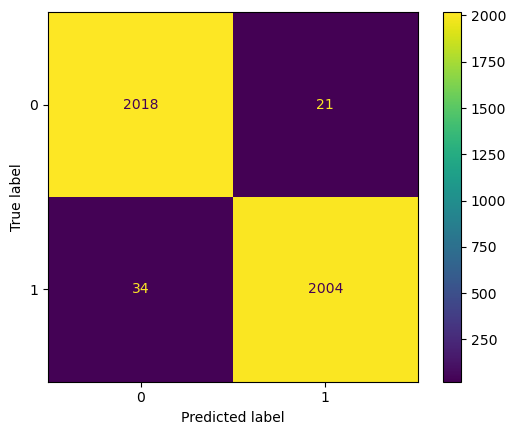

In [93]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

random_seed = 42

svc = SVC(random_state=random_seed)
svc.fit(X_train_transformed, y_train_transformed)
print('Accuracy of LR classifier on training set: {:.4f}'.format(svc.score(X_train_transformed, y_train_transformed)))
print('Accuracy of LR classifier on test set: {:.4f}'.format(svc.score(X_test_transformed, y_test_transformed)))

pred = svc.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, svc.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

plt.show()

In [94]:
acc_train1_svc = svc.score(X_train_transformed, y_train_transformed)
acc_test1_svc = svc.score(X_test_transformed, y_test_transformed)

#### Cross validation for hyperparameter tuning

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': [0.01, 0.1, 1]}

In [97]:
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_test_transformed, y_test_transformed)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [98]:
print("Best parameters found: ",grid_search.best_params_)

Best parameters found:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [99]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score').head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.09,0.01,0.06,0.00,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.98,0.99,0.99,0.99,0.98,0.99,0.00,1
23,0.10,0.00,0.01,0.00,10,0.1,poly,"{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}",0.98,0.98,0.98,0.98,0.98,0.98,0.00,2
8,0.15,0.02,0.01,0.00,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.97,0.98,0.98,0.98,0.98,0.98,0.00,3


In [100]:
# grid_search.predict(x_test)

#### Re-run model

Accuracy of SV classifier on training set: 0.9882
Accuracy of SV classifie on test set: 0.9975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2039
           1       1.00      1.00      1.00      2038

    accuracy                           1.00      4077
   macro avg       1.00      1.00      1.00      4077
weighted avg       1.00      1.00      1.00      4077



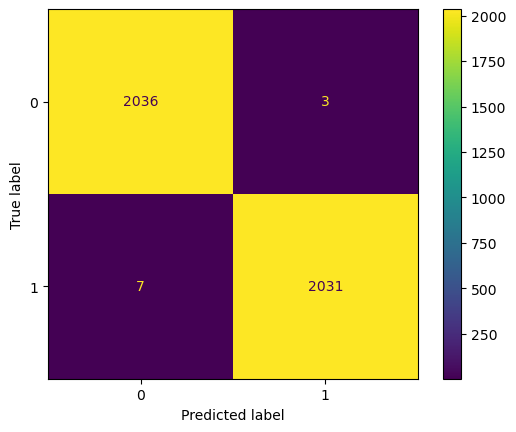

In [101]:
print('Accuracy of SV classifier on training set: {:.4f}'.format(grid_search.score(X_train_transformed, y_train_transformed)))
print('Accuracy of SV classifie on test set: {:.4f}'.format(grid_search.score(X_test_transformed, y_test_transformed)))

pred = grid_search.predict(X_test_transformed)

print(classification_report(y_test_transformed, pred))

cm = confusion_matrix(y_test_transformed, grid_search.predict(X_test_transformed))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

plt.show()

In [102]:
acc_train2_svc = grid_search.score(X_train_transformed, y_train_transformed)
acc_test2_svc = grid_search.score(X_test_transformed, y_test_transformed)

#### Feature importance

In [103]:
# importances = svc.feature_importances_

# # Sort the feature importances in descending order
# indices = np.argsort(importances)[::-1]
# feature_names = data_resampled.columns[1:]
# names = [feature_names[i] for i in indices]

# importance_df = pd.DataFrame({'feature_name': feature_names, 'importance': importances})

# # Sort the dataframe by importance
# importance_df.sort_values(by='importance', ascending=False, inplace=True)

# # Print the top 10 features
# print(importance_df.head(10))

# fi_svc = importance_df

In [104]:
# # Create plot
# plt.figure()

# # Create plot title
# plt.title("Feature Importance")

# # Add bars
# plt.bar(range(X_train.shape[1]), importances[indices])

# # Add feature names as x-axis labels
# plt.xticks(range(X_train.shape[1]), names, rotation=90)

# # Show plot
# plt.show()

In [105]:
### XGBoost

In [106]:
### Gradient Boosting

## Visualizations

### Model accuracies

In [107]:
df = {'model': ['LightGBM', 'AdaBoost', 'Random Forest', 'Bagging', 'SVC'], 
            'train_accuracy': [acc_train1_LBGM, acc_train1_ada, acc_train1_rf, acc_train1_bagging, acc_train1_svc], 
            'test_accuracy': [acc_test1_LBGM, acc_test1_ada, acc_test1_rf, acc_test1_bagging, acc_test1_svc],
            'train_accuracy_CV': [acc_train2_LBGM, acc_train2_ada, acc_train2_rf, acc_train2_bagging, acc_train2_svc], 
            'test_accuracy_CV': [acc_test2_LBGM, acc_test2_ada, acc_test2_rf, acc_test2_bagging, acc_test2_svc]}

accuracy = pd.DataFrame(df)


In [108]:
df = pd.DataFrame(df)
df

,model,train_accuracy,test_accuracy,train_accuracy_CV,test_accuracy_CV
0,LightGBM,1.00,1.00,1.00,1.00
1,AdaBoost,0.99,0.99,1.00,1.00
2,Random Forest,1.00,0.99,0.98,1.00
3,Bagging,0.97,0.97,0.97,0.97
4,SVC,0.99,0.99,0.99,1.00


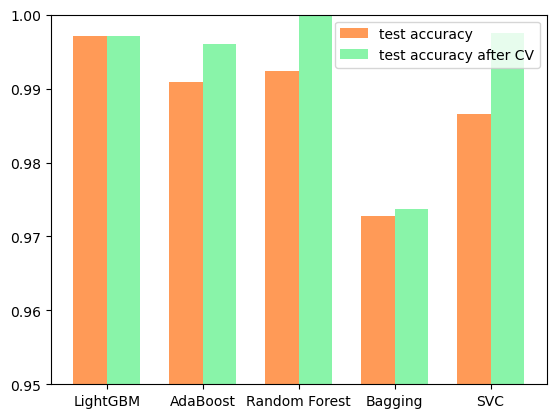

In [109]:
bar_width = 0.35

models = np.arange(len(df['model']))

plt.bar(models - bar_width/2, df['test_accuracy'], bar_width, 
        color='#FF8F45', label='test accuracy', alpha=0.9)
plt.bar(models + bar_width/2, df['test_accuracy_CV'], bar_width, 
        color='#7CF3A0', label='test accuracy after CV', alpha=0.9)

plt.xticks(models, df['model'])
plt.ylim(0.95, 1)
plt.legend()
plt.show()

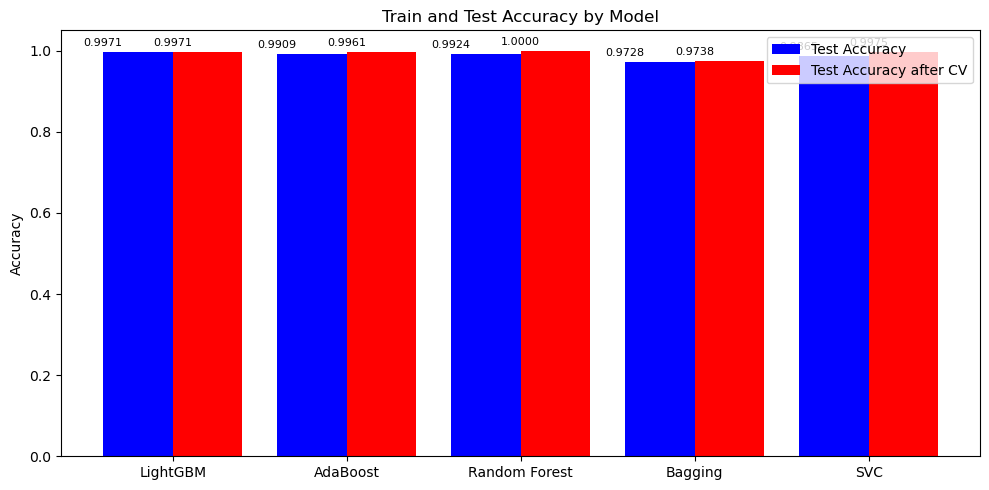

In [110]:
bar_width = 0.4
index = df.index

fig, ax = plt.subplots(figsize=(10, 5))

train_acc = ax.bar(index, df['test_accuracy'], bar_width, color='b')
test_acc = ax.bar(index + bar_width, df['test_accuracy_CV'], bar_width, color='r')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df['model'])
ax.set_ylabel('Accuracy')
ax.set_title('Train and Test Accuracy by Model')

plt.legend((train_acc[0], test_acc[0]), ('Test Accuracy', 'Test Accuracy after CV'))

for i, v in enumerate(df['test_accuracy']):
    plt.text(i - bar_width/2, v + 0.01, format(v, '.4f'), fontsize=8, ha='center', va='bottom')

for i, v in enumerate(df['test_accuracy_CV']):
    plt.text(i + bar_width/2, v + 0.01, format(v, '.4f'), fontsize=8, ha='center', va='bottom')

plt.tight_layout()
plt.show()





In [127]:
df.to_csv("accuracy_1mm_over.csv")

In [111]:
# acc_train1_LBGM
# acc_test1_LBGM

# acc_train1_ada
# acc_test1_ada

# acc_train1_rf
# acc_test1_rf

# acc_train1_bagging
# acc_test1_bagging

# acc_train1_svc 
# acc_test1_svc

# acc_train2_LBGM
# acc_test2_LBGM

# acc_train2_ada 
# acc_test2_ada 

# acc_train2_rf
# acc_test2_rf

# acc_train2_bagging 
# acc_test2_bagging

# acc_train2_svc
# acc_test2_svc

### Overall feature importance

In [112]:
fi_LGBM['importance'] = fi_LGBM['importance'] / fi_LGBM['importance'].sum()

In [113]:
fi_LGBM['rank'] = range(1, fi_LGBM.shape[0]+1)

In [114]:
fi_LGBM.head(5)

,feature_name,importance,rank
33,Ellipticity,0.17,1
24,Curvature,0.10,2
22,Extent,0.10,3
13,L/T Ratio,0.05,4
25,Surface Area,0.04,5


In [115]:
fi_LGBM = fi_LGBM[['feature_name','importance']]
fi_LGBM = fi_LGBM.reset_index(drop=True)

In [116]:
fi_ada['rank'] = range(1, fi_ada.shape[0]+1)

In [117]:
fi_ada.head(5)

,feature_name,importance,rank
33,Ellipticity,0.20,1
24,Curvature,0.12,2
22,Extent,0.10,3
12,Sphericity,0.10,4
30,CHull Surface Area,0.08,5


In [118]:
fi_ada = fi_ada[['feature_name','importance']]
fi_ada = fi_ada.reset_index(drop=True)

In [119]:
fi_rf['rank'] = range(1, fi_rf.shape[0]+1)

In [120]:
fi_rf.head()

,feature_name,importance,rank
30,CHull Surface Area,0.17,1
29,T/W Ratio,0.12,2
2,FLength,0.09,3
7,Volume,0.08,4
33,Ellipticity,0.06,5


In [121]:
fi_rf = fi_rf[['feature_name','importance']]
fi_rf = fi_rf.reset_index(drop=True)

In [122]:
fi = pd.concat([fi_LGBM, fi_ada, fi_rf])

In [123]:
mean_rank = fi.groupby('feature_name').mean()
mean_rank.sort_values(by='importance', ascending=False, inplace=True)

In [124]:
mean_rank.head(10)

,importance
feature_name,
Ellipticity,0.14
CHull Surface Area,0.10
Curvature,0.08
Extent,0.07
Sphericity,0.05
T/W Ratio,0.04
FLength,0.04
L/T Ratio,0.04
W/L Ratio,0.04


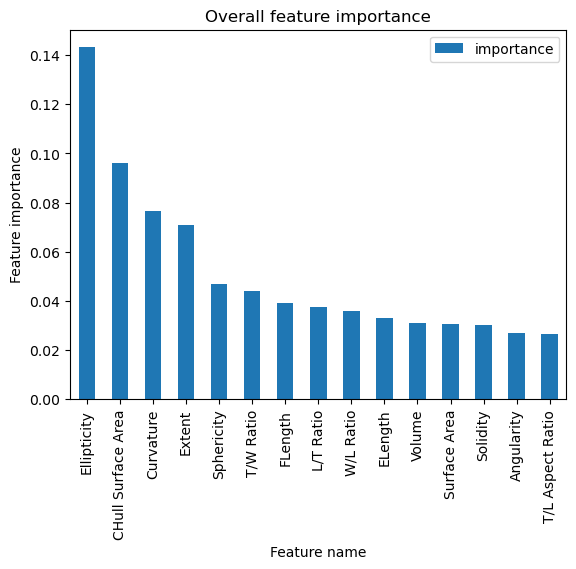

In [125]:
import matplotlib.pyplot as plt

mean_rank.reset_index(inplace=True)
mean_rank.head(15).plot(kind='bar', x='feature_name', y='importance')
plt.xlabel('Feature name')
plt.ylabel('Feature importance')
plt.title('Overall feature importance')
plt.show()

In [126]:
mean_rank[['feature_name','importance']]

,feature_name,importance
0,Ellipticity,0.14
1,CHull Surface Area,0.10
2,Curvature,0.08
3,Extent,0.07
4,Sphericity,0.05
5,T/W Ratio,0.04
6,FLength,0.04
7,L/T Ratio,0.04
8,W/L Ratio,0.04
9,ELength,0.03


In [128]:
mean_rank[['feature_name','importance']].to_csv("fi_1mm_over.csv")